In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
path = '../data/bikeshare/'
data_files = ['2017-q1_trip_history_data.csv', '2017-q2_trip_history_data.csv',
              '2017-q3_trip_history_data.csv', '2017-q4_trip_history_data.csv']

In [3]:
data_df_list = []
for file in data_files:
    full_path = os.path.join(path, file)
    data_df = pd.read_csv(full_path)
    data_df_list.append(data_df)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data_df_list[0].head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,221834,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member
1,1676854,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual
2,1356956,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual
3,1327901,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual
4,1636768,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual


In [6]:
member_dur_list = []
casual_dur_list = []
for data_df in data_df_list:
    mem_mean_dur = (data_df['Duration (ms)'][data_df['Member type']=='Member']/1000/60).mean()
    member_dur_list.append(mem_mean_dur)
    cas_mean_dur = (data_df['Duration (ms)'][data_df['Member type']=='Casual']/1000/60).mean()
    casual_dur_list.append(cas_mean_dur)

In [7]:
member_dur_list

[11.51173404858448, 12.39381192932041, 12.590282204738374, 11.922725559957398]

In [8]:
casual_dur_list

[40.76690234804407, 40.93548325768106, 38.42203748802542, 36.12188032420145]

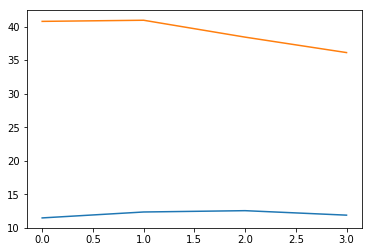

In [12]:
plt.figure()
plt.plot(member_dur_list)
plt.plot(casual_dur_list)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


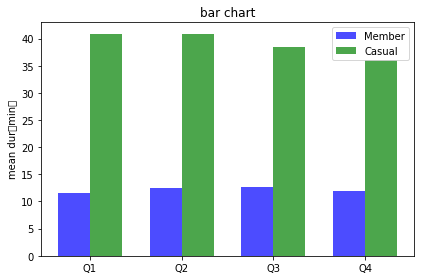

In [35]:
bar_loc = np.arange(4)
bar_width = 0.35
x_ticks = ['Q{}'.format(i+1) for i in range(4)]
plt.figure()
plt.bar(bar_loc, member_dur_list, width=bar_width, color='b', alpha=0.7, label='Member')
plt.bar(bar_loc+bar_width, casual_dur_list, width=bar_width, color='g', alpha=0.7, label='Casual')
plt.xticks(bar_loc+bar_width/2, x_ticks)
plt.ylabel('mean dur（min）')
plt.title('bar chart')
plt.legend(loc='best')

plt.tight_layout()

```python
# 数据源同上

"""
    明确任务：绘制不同用户季度平均骑行时间的分组柱状图
"""
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties #针对mac系统

# 解决matplotlib中文显示问题，仅适用windows系统
plt.rcParams['font.sans-serif'] = ['SimHei']

# 解决matplotlib中文显示问题，仅适用mac系统
def get_chinese_font():
    return FontProperties(fanme='/System/Library/Fonts/PingFang.ttc')

data_path = './data/bikeshare/'
data_filenames = ['2017-q1_trip_history_data.csv', '2017-q2_trip_history_data.csv',
                  '2017-q3_trip_history_data.csv', '2017-q4_trip_history_data.csv']

# 结果保存路径
output_path = './output'
if not os.path.exists(output_path):
    os.makedirs(output_path)


def collect_process_analyze_data():
    """
        Step 1+2+3: 数据获取，数据处理，数据分析
    """
    member_mean_duration_list = []
    casual_mean_duration_list = []

    for data_filename in data_filenames:
        data_file = os.path.join(data_path, data_filename)
        data_arr = np.loadtxt(data_file, delimiter=',', dtype='str', skiprows=1)

        # 去掉双引号
        # 骑行时间
        duration_col = np.core.defchararray.replace(data_arr[:, 0], '"', '')
        duration_col = duration_col.reshape(-1, 1)
        # 用户类型
        member_type_col = np.core.defchararray.replace(data_arr[:, -1], '"', '')
        member_type_col = member_type_col.reshape(-1, 1)
        duration_member_type_arr = np.concatenate([duration_col, member_type_col], axis=1)

        # 会员平均骑行时间
        member_arr = duration_member_type_arr[duration_member_type_arr[:, 1] == 'Member']
        member_mean_duration = np.mean(member_arr[:, 0].astype('float') / 1000 / 60)
        member_mean_duration_list.append(member_mean_duration)

        # 非会员平均骑行时间
        causal_arr = duration_member_type_arr[duration_member_type_arr[:, 1] == 'Casual']
        casual_mean_duration = np.mean(causal_arr[:, 0].astype('float') / 1000 / 60)
        casual_mean_duration_list.append(casual_mean_duration)

    return member_mean_duration_list, casual_mean_duration_list


def save_and_show_results(member_mean_duration_list, casual_mean_duration_list):
    """
        Step 4: 结果展示
    """
    bar_locs = np.arange(4)
    bar_width = 0.35    # 柱子宽度
    xtick_labels = ['第{}季度'.format(i + 1) for i in range(4)]

    # xtick_labels = []
    # for i in range(4):
    #     xtick_labels.append('第{}季度'.format(i + 1))

    plt.figure()
    plt.bar(bar_locs, member_mean_duration_list, width=bar_width, color='g', alpha=0.7, label='会员')
    plt.bar(bar_locs + bar_width, casual_mean_duration_list, width=bar_width, color='r', alpha=0.7, label='非会员')
    plt.xticks(bar_locs + bar_width / 2, xtick_labels, rotation=45)
    plt.ylabel('平均骑行时间（单位：分钟）')
    plt.title('柱状图')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.savefig(os.path.join(output_path, 'group_bar_chart.png'))
    plt.show()


def main():
    """
        主函数
    """
    # Step 1 + 2 + 3: 数据获取，数据处理，数据分析
    member_mean_duration_list, casual_mean_duration_list = collect_process_analyze_data()

    save_and_show_results(member_mean_duration_list, casual_mean_duration_list)


if __name__ == '__main__':
    main()
```